In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:

energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [100]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [101]:
for column in energy_df:
    all_zeros_or_null = (energy_df[column] == 0) | pd.isnull(energy_df[column])
    print(column, ": ", all_zeros_or_null.all())

time :  False
generation biomass :  False
generation fossil brown coal/lignite :  False
generation fossil coal-derived gas :  True
generation fossil gas :  False
generation fossil hard coal :  False
generation fossil oil :  False
generation fossil oil shale :  True
generation fossil peat :  True
generation geothermal :  True
generation hydro pumped storage aggregated :  True
generation hydro pumped storage consumption :  False
generation hydro run-of-river and poundage :  False
generation hydro water reservoir :  False
generation marine :  True
generation nuclear :  False
generation other :  False
generation other renewable :  False
generation solar :  False
generation waste :  False
generation wind offshore :  True
generation wind onshore :  False
forecast solar day ahead :  False
forecast wind offshore eday ahead :  True
forecast wind onshore day ahead :  False
total load forecast :  False
total load actual :  False
price day ahead :  False
price actual :  False


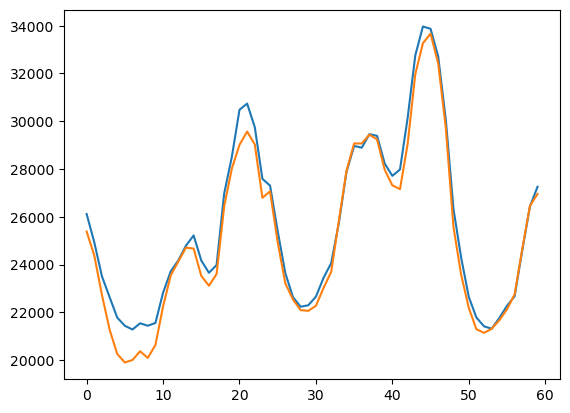

In [102]:
# Plotting two columns in one graph
plt.plot(energy_df['total load forecast'][:60], label='toal load forecast')
plt.plot(energy_df['total load actual'][:60], label='total load actual')

plt.show()

In [103]:
# Remove all zeros and null 
energy_df = energy_df.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead'], 
                            axis=1)

In [104]:
for column in energy_df:
    all_zeros_or_null = (energy_df[column] == 0) | pd.isnull(energy_df[column])
    print(column, ": ", all_zeros_or_null.all())

time :  False
generation biomass :  False
generation fossil brown coal/lignite :  False
generation fossil gas :  False
generation fossil hard coal :  False
generation fossil oil :  False
generation hydro pumped storage consumption :  False
generation hydro run-of-river and poundage :  False
generation hydro water reservoir :  False
generation nuclear :  False
generation other :  False
generation other renewable :  False
generation solar :  False
generation waste :  False
generation wind onshore :  False
forecast solar day ahead :  False
forecast wind onshore day ahead :  False
total load forecast :  False
total load actual :  False
price day ahead :  False
price actual :  False


0        28251.0
1        27818.0
2        26796.0
3        25223.0
4        24620.0
          ...   
35059    26415.0
35060    25213.0
35061    23987.0
35062    22748.0
35063    22605.0
Length: 35064, dtype: float64


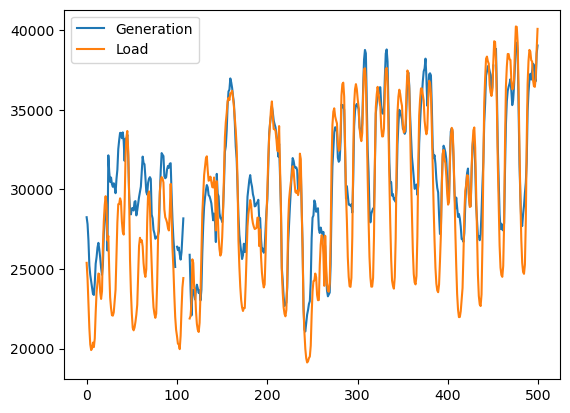

In [105]:
sum_of_generation = energy_df["generation biomass"]+ energy_df["generation fossil brown coal/lignite"]+ energy_df["generation fossil gas"]+energy_df["generation fossil hard coal"]+energy_df["generation fossil oil"]+ energy_df["generation hydro pumped storage consumption"]+energy_df["generation hydro run-of-river and poundage"]+energy_df["generation hydro water reservoir"]+energy_df["generation nuclear"]+energy_df["generation other"]+energy_df["generation other renewable"]+energy_df["generation solar"]+energy_df["generation waste"]+energy_df["generation wind onshore"]
print(sum_of_generation)

# Plotting generation vs laod actual
plt.plot(sum_of_generation[:500], label="Generation")
plt.plot(energy_df['total load actual'][:500], label="Load")
plt.legend()
plt.show()

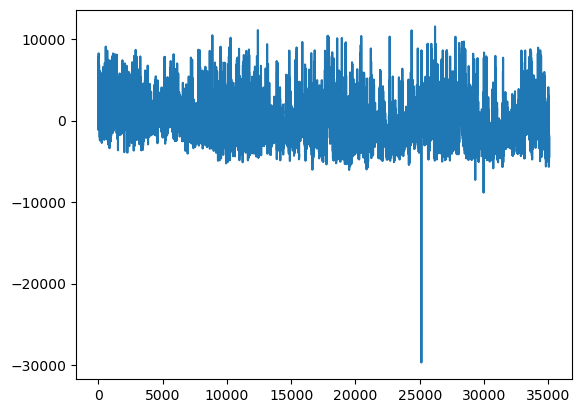

'can see that there probebly is some anomolies here, suddenly goes - alot'

In [106]:
difference = sum_of_generation-energy_df['total load actual']
plt.plot(difference)
plt.show()

"can see that there probebly is some anomolies here, suddenly goes - alot"

In [107]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [108]:
for column in weather_df:
    all_zeros_or_null = (weather_df[column] == 0) | pd.isnull(weather_df[column])
    print(column, ": ", all_zeros_or_null.all())

dt_iso

 :  False
city_name :  False
temp :  False
temp_min :  False
temp_max :  False
pressure :  False
humidity :  False
wind_speed :  False
wind_deg :  False
rain_1h :  False
rain_3h :  False
snow_3h :  False
clouds_all :  False
weather_id :  False
weather_main :  False
weather_description :  False
weather_icon :  False


In [109]:
weather_df["weather_icon"]
difference_icon = weather_df["weather_icon"]=="01n"


array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'temp_min'}>,
        <Axes: title={'center': 'temp_max'}>],
       [<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'wind_speed'}>],
       [<Axes: title={'center': 'wind_deg'}>,
        <Axes: title={'center': 'rain_1h'}>,
        <Axes: title={'center': 'rain_3h'}>],
       [<Axes: title={'center': 'snow_3h'}>,
        <Axes: title={'center': 'clouds_all'}>,
        <Axes: title={'center': 'weather_id'}>]], dtype=object)

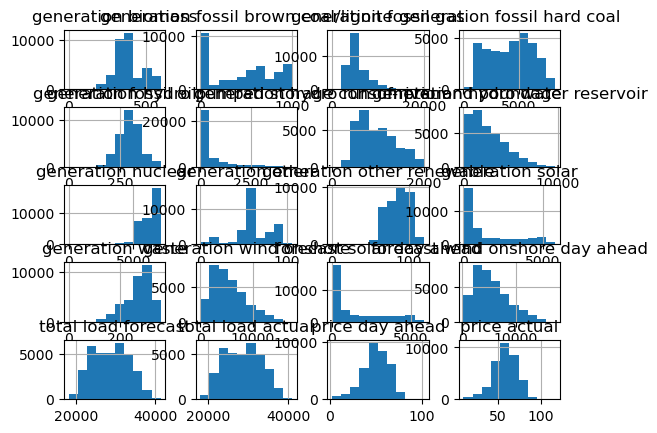

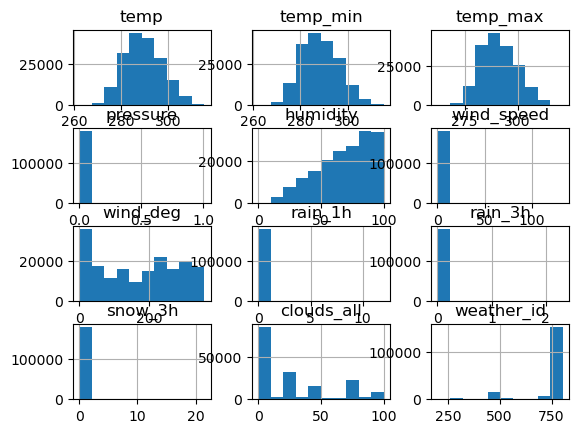

In [110]:
energy_df.hist()
weather_df.hist()

In [111]:
data = pd.merge(energy_df, weather_df, left_on='time', right_on='dt_iso')
#print(data.dtypes)
print("gjøøøøør noe")
print(pd.to_datetime(data["time"]))
data["time"] = pd.to_datetime(data["time"] ,utc=True)

data.set_index('time', inplace=True)
data.head()
#data.index = pd.to_datetime(data.index)


# Check for duplicate columns
duplicates = data.columns.duplicated()
if any(duplicates):
    print("Duplicate columns found. Check the column names.")
    data = data.loc[:, ~duplicates]


# Check if 'city_name' and 'price actual' are available
print(data.columns)
print("hhaudhadhuashd", data.index)

data

gjøøøøør noe
0         2015-01-01 00:00:00+01:00
1         2015-01-01 00:00:00+01:00
2         2015-01-01 00:00:00+01:00
3         2015-01-01 00:00:00+01:00
4         2015-01-01 00:00:00+01:00
                    ...            
178391    2018-12-31 23:00:00+01:00
178392    2018-12-31 23:00:00+01:00
178393    2018-12-31 23:00:00+01:00
178394    2018-12-31 23:00:00+01:00
178395    2018-12-31 23:00:00+01:00
Name: time, Length: 178396, dtype: object
Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load 

In [112]:
data.describe()
#Very different qunataties (not standardized at all)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,month
count,178301.000000,178306.000000,178306.000000,178306.000000,178301.000000,178301.000000,178301.000000,178306.000000,178311.000000,178306.000000,...,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,382.999002,448.256890,5626.254428,4254.162345,298.149651,475.121143,972.937364,2606.765852,6263.549316,60.160606,...,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902,6.524132
std,85.256652,354.297585,2203.888156,1960.883415,52.464334,792.399286,400.974209,1835.930904,839.973970,20.212231,...,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223,3.461164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,1.000000
25%,333.000000,0.000000,4127.000000,2526.000000,263.000000,0.000000,638.000000,1079.000000,5757.000000,53.000000,...,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000,4.000000
50%,366.000000,509.000000,4972.000000,4473.000000,300.000000,67.000000,907.000000,2166.000000,6563.000000,57.000000,...,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000,7.000000
75%,430.000000,757.000000,6435.000000,5836.000000,330.000000,615.000000,1251.000000,3759.000000,7025.000000,80.000000,...,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000,10.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,...,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000,12.000000


In [113]:
data.isnull().any()

generation biomass                              True
generation fossil brown coal/lignite            True
generation fossil gas                           True
generation fossil hard coal                     True
generation fossil oil                           True
generation hydro pumped storage consumption     True
generation hydro run-of-river and poundage      True
generation hydro water reservoir                True
generation nuclear                              True
generation other                                True
generation other renewable                      True
generation solar                                True
generation waste                                True
generation wind onshore                         True
forecast solar day ahead                       False
forecast wind onshore day ahead                False
total load forecast                            False
total load actual                               True
price day ahead                               

array([[<Axes: title={'center': 'generation biomass'}>,
        <Axes: title={'center': 'generation fossil brown coal/lignite'}>,
        <Axes: title={'center': 'generation fossil gas'}>,
        <Axes: title={'center': 'generation fossil hard coal'}>,
        <Axes: title={'center': 'generation fossil oil'}>,
        <Axes: title={'center': 'generation hydro pumped storage consumption'}>],
       [<Axes: title={'center': 'generation hydro run-of-river and poundage'}>,
        <Axes: title={'center': 'generation hydro water reservoir'}>,
        <Axes: title={'center': 'generation nuclear'}>,
        <Axes: title={'center': 'generation other'}>,
        <Axes: title={'center': 'generation other renewable'}>,
        <Axes: title={'center': 'generation solar'}>],
       [<Axes: title={'center': 'generation waste'}>,
        <Axes: title={'center': 'generation wind onshore'}>,
        <Axes: title={'center': 'forecast solar day ahead'}>,
        <Axes: title={'center': 'forecast wind on

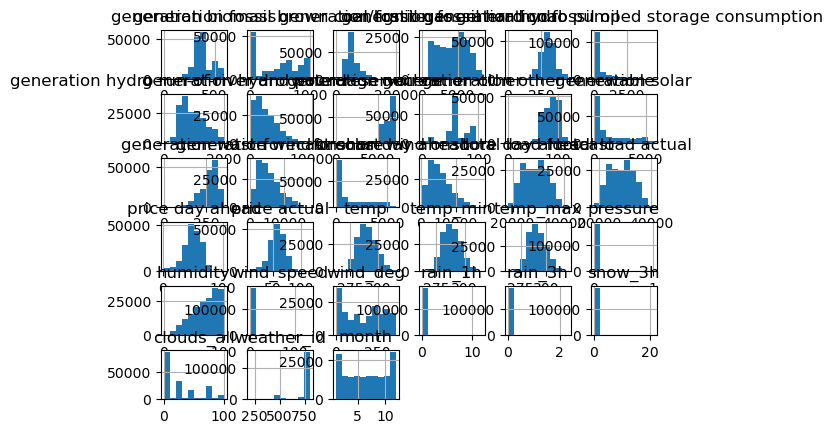

In [114]:
data.hist()

In [121]:
# we are looking at predicting power usage, only look at total load actually
total_load_df = data[["total load actual"]]
total_load_df.head()
index_data_type = total_load_df.index.astype(str)
print(index_data_type)

total_load_df["month"]= total_load_df.index.month
total_load_df["weekday"]= total_load_df.index.weekday
total_load_df["hour"]= total_load_df.index.hour

total_load_df
#total_load_df['month'] = total_load_df.index.month
# codes_bt['weekday'] = codes_bt.index.weekday
# codes_bt['hour'] = codes_bt.index.hour
# codes_bt


Index(['2014-12-31 23:00:00+00:00', '2014-12-31 23:00:00+00:00',
       '2014-12-31 23:00:00+00:00', '2014-12-31 23:00:00+00:00',
       '2014-12-31 23:00:00+00:00', '2015-01-01 00:00:00+00:00',
       '2015-01-01 00:00:00+00:00', '2015-01-01 00:00:00+00:00',
       '2015-01-01 00:00:00+00:00', '2015-01-01 00:00:00+00:00',
       ...
       '2018-12-31 21:00:00+00:00', '2018-12-31 21:00:00+00:00',
       '2018-12-31 21:00:00+00:00', '2018-12-31 21:00:00+00:00',
       '2018-12-31 21:00:00+00:00', '2018-12-31 22:00:00+00:00',
       '2018-12-31 22:00:00+00:00', '2018-12-31 22:00:00+00:00',
       '2018-12-31 22:00:00+00:00', '2018-12-31 22:00:00+00:00'],
      dtype='object', name='time', length=178396)


/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_40800/481714801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["month"]= total_load_df.index.month
/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_40800/481714801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["weekday"]= total_load_df.index.weekday
/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_40800/481714801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,total load actual,month,weekday,hour
time,,,,
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2014-12-31 23:00:00+00:00,25385.0,12,2,23
...,...,...,...,...
2018-12-31 22:00:00+00:00,24455.0,12,0,22
2018-12-31 22:00:00+00:00,24455.0,12,0,22
2018-12-31 22:00:00+00:00,24455.0,12,0,22
